# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Set base URL
url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    if response.status_code == 200:
        # Parse the JSON and retrieve data
        city_weather = response.json()
            
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lng = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("wind", {}).get("speed", None)
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    else:
        print(f"Request failed for city:{city}")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | mafinga
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | inari
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | selfoss
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | la passe
Processing Record 10 of Set 1 | gursarai
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | taulaga
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | castelo do piaui
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | afif
Processing Record 22 of Set 1 | saint-louis
Processing 

Processing Record 41 of Set 4 | ceeldheer
Processing Record 42 of Set 4 | ngaoundere
Processing Record 43 of Set 4 | fort mcmurray
Processing Record 44 of Set 4 | daru
Processing Record 45 of Set 4 | coahuayana de hidalgo
Processing Record 46 of Set 4 | general conesa
Processing Record 47 of Set 4 | borgarnes
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | nago
Processing Record 0 of Set 5 | kuanda
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | barclayville
Processing Record 3 of Set 5 | akureyri
Processing Record 4 of Set 5 | flying fish cove
Processing Record 5 of Set 5 | bardsir
Processing Record 6 of Set 5 | badger
Processing Record 7 of Set 5 | new holland
Processing Record 8 of Set 5 | clarksburg
Processing Record 9 of Set 5 | apple valley
Processing Record 10 of Set 5 | larache
Processing Record 11 of Set 5 | hami
Processing Record 12 of Set 5 | puerto deseado
Processing Record 13 of Set 5 | ngereklmadel
Processing Record 14 of Set 5 

Processing Record 35 of Set 8 | bubaque
Processing Record 36 of Set 8 | cangucu
Processing Record 37 of Set 8 | pitogo
Processing Record 38 of Set 8 | vilyuchinsk
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | pitkyaranta
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | crane
Processing Record 43 of Set 8 | saint-marc
Processing Record 44 of Set 8 | prince albert
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | yamada
Processing Record 47 of Set 8 | port alfred
Processing Record 48 of Set 8 | howrah
Processing Record 49 of Set 8 | mahibadhoo
Processing Record 0 of Set 9 | saint-joseph
Processing Record 1 of Set 9 | dunay
Processing Record 2 of Set 9 | san andros
Request failed for city:san andros
Processing Record 3 of Set 9 | loreto
Processing Record 4 of Set 9 | boryeong
Processing Record 5 of Set 9 | suhbaatar
Processing Record 6 of Set 9 | revda
Processing Record 7 of Set 9 | harran
Processing Record 8 of Set 9 | umm 

Processing Record 25 of Set 12 | yuncheng
Processing Record 26 of Set 12 | itoman
Processing Record 27 of Set 12 | achinsk
Processing Record 28 of Set 12 | kandyagash
Processing Record 29 of Set 12 | gobernador virasora
Processing Record 30 of Set 12 | tadine
Processing Record 31 of Set 12 | tazacorte
Processing Record 32 of Set 12 | mulanje
Processing Record 33 of Set 12 | mana
Processing Record 34 of Set 12 | najran
Processing Record 35 of Set 12 | puerto armuelles
Processing Record 36 of Set 12 | le blanc
Processing Record 37 of Set 12 | tofol
Processing Record 38 of Set 12 | sechura
Processing Record 39 of Set 12 | naifaru
Processing Record 40 of Set 12 | north branch
Processing Record 41 of Set 12 | salalah
Processing Record 42 of Set 12 | kayyerkan
Processing Record 43 of Set 12 | ajaccio
Processing Record 44 of Set 12 | hobyo
Processing Record 45 of Set 12 | rawai
Processing Record 46 of Set 12 | lensk
Processing Record 47 of Set 12 | punalur
Processing Record 48 of Set 12 | niz

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.1835,-51.7216,27.21,68,100,2.30,2.30,1701840057
1,mafinga,-7.2500,35.0667,71.40,81,100,1.48,1.48,1701840123
2,waitangi,-43.9535,-176.5597,56.82,80,100,10.00,10.00,1701840124
3,inari,68.9060,27.0288,5.20,98,98,1.77,1.77,1701840124
4,yellowknife,62.4560,-114.3525,24.42,95,100,4.61,4.61,1701840124


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,27.21,68,100,2.30,2.30,1701840057
1,mafinga,-7.2500,35.0667,71.40,81,100,1.48,1.48,1701840123
2,waitangi,-43.9535,-176.5597,56.82,80,100,10.00,10.00,1701840124
3,inari,68.9060,27.0288,5.20,98,98,1.77,1.77,1701840124
4,yellowknife,62.4560,-114.3525,24.42,95,100,4.61,4.61,1701840124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

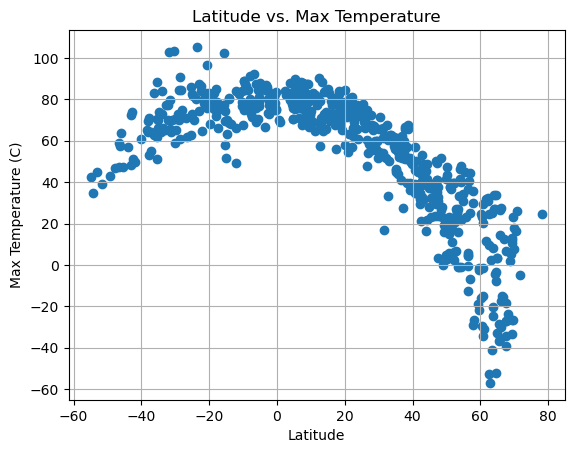

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
 

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

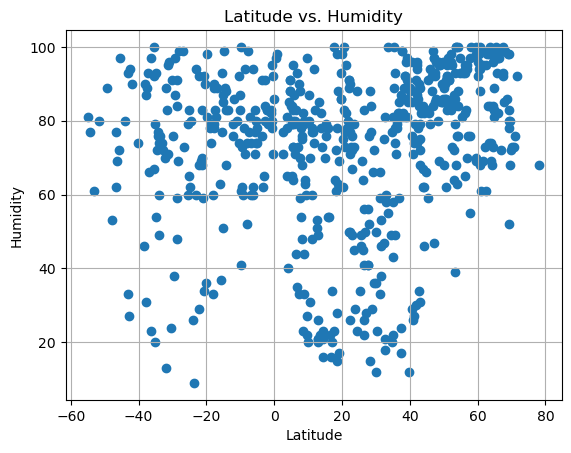

In [6]:
# Build the plot Latitude vs Humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

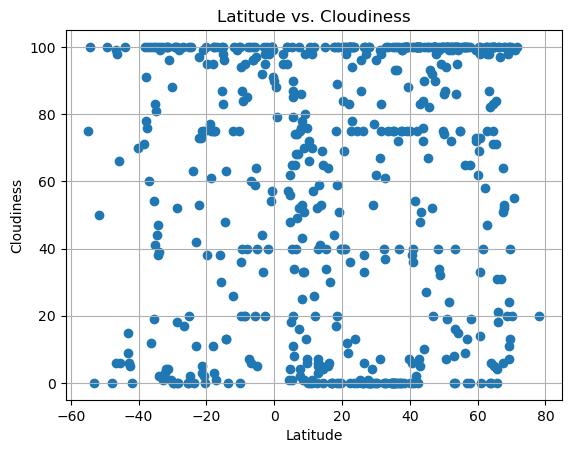

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

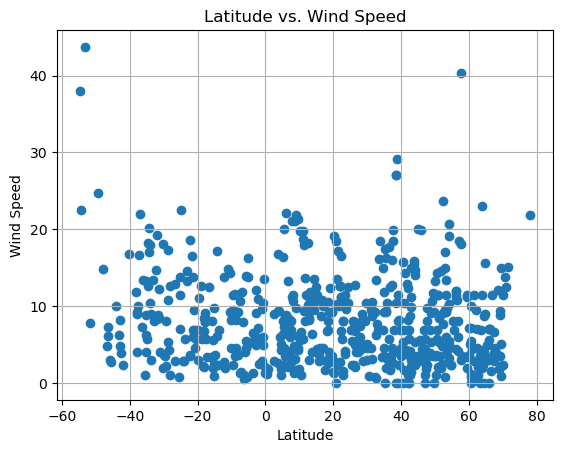

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, y_label, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,27.21,68,100,2.30,2.30,1701840057
3,inari,68.9060,27.0288,5.20,98,98,1.77,1.77,1701840124
4,yellowknife,62.4560,-114.3525,24.42,95,100,4.61,4.61,1701840124
6,selfoss,63.9331,-20.9971,27.21,69,100,11.39,11.39,1701840125
7,ribeira grande,38.5167,-28.7000,67.77,92,100,27.00,27.00,1701839560
...,...,...,...,...,...,...,...,...,...
584,mian channun,30.4400,72.3543,71.42,23,0,0.96,0.96,1701840335
585,solnechnyy,50.7214,136.6319,15.03,91,100,6.93,6.93,1701840335
586,sonargaon,23.6422,90.6023,77.05,73,100,3.78,3.78,1701840335


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mafinga,-7.2500,35.0667,71.40,81,100,1.48,1.48,1701840123
2,waitangi,-43.9535,-176.5597,56.82,80,100,10.00,10.00,1701840124
5,adamstown,-25.0660,-130.1015,72.93,83,100,13.76,13.76,1701840125
10,blackmans bay,-43.0167,147.3167,72.52,33,15,4.81,4.81,1701839568
13,grytviken,-54.2811,-36.5092,34.83,77,100,22.46,22.46,1701840128


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7714443836872114


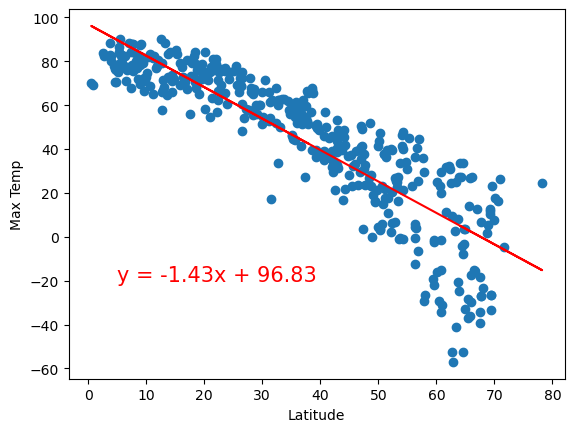

In [17]:
# Linear regression on Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
linear_regression(x_values, y_values, "Max Temp",(5,-20))

The r-value is: 0.3211234220118944


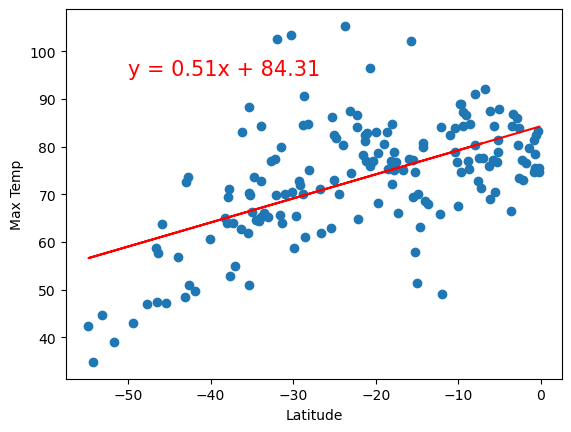

In [26]:
# Linear regression on Southern Hemisphere
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
linear_regression(x_values, y_values, "Max Temp",(-50,95))

**Discussion about the linear relationship:** In the norther hemisphere there is a strong relationship as the r-value is closer to 1 and for the southern hemispere there is a somewhat a correlation. Overall, I would say there is a correlation between temperature and latitude, but more so for the northern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13774427108247975


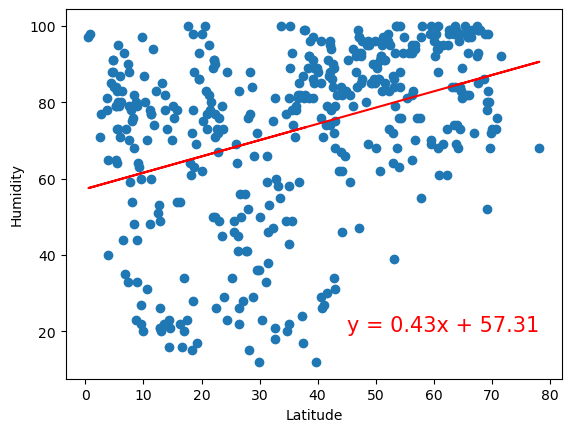

In [32]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
linear_regression(x_values, y_values, "Humidity",(45,20))

The r-value is: 0.018389246913787526


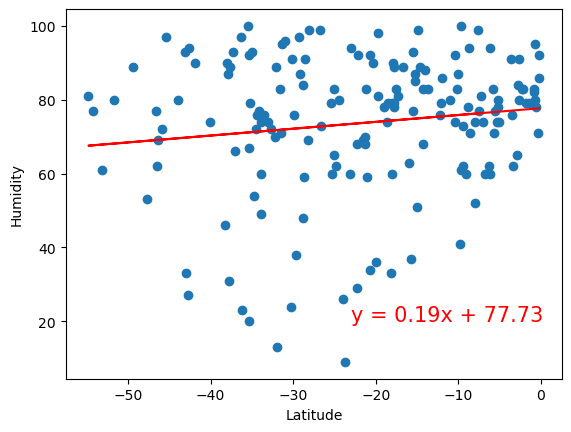

In [37]:
# Southern Hemisphere
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
linear_regression(x_values, y_values, "Humidity",(-23,20))

**Discussion about the linear relationship:** With both r-values being very close to 0 there is a weak to no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.036979569858149


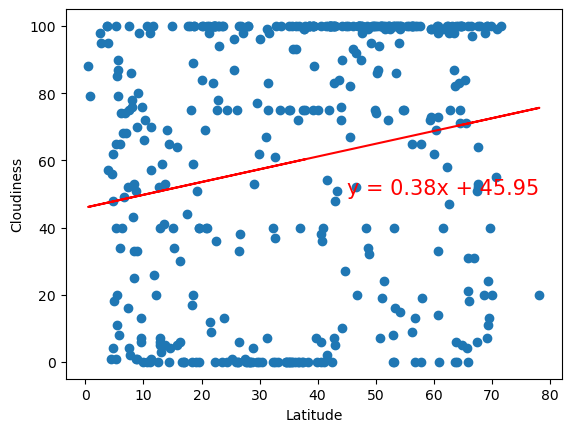

In [43]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness",(45,50))

The r-value is: 0.02056735429994368


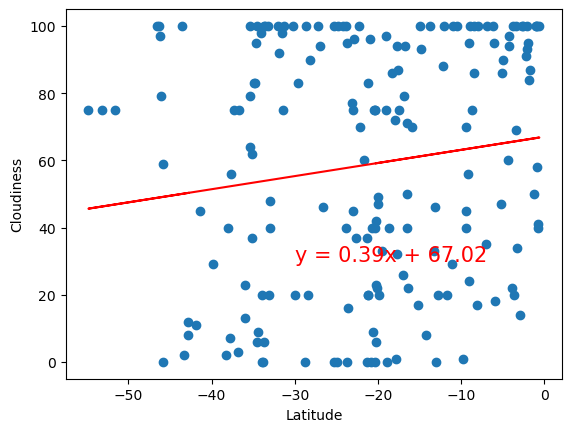

In [20]:
# Southern Hemisphere
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness",(45,50))

**Discussion about the linear relationship:** With both correlations being very close to 0, you can conclude there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003334116712004329


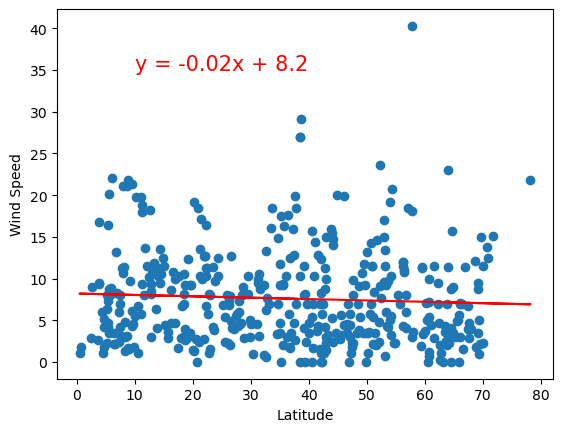

In [45]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed",(10,35))

The r-value is: 0.11794566955147148


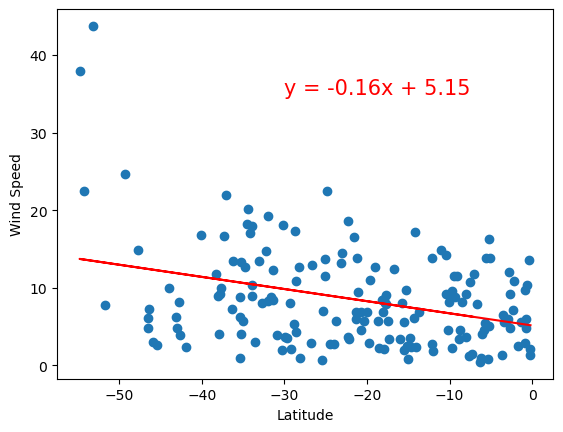

In [47]:
# Southern Hemisphere
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed",(-30,35))

**Discussion about the linear relationship:** With both correlations being very close to 0, you can conclude there is no correlation between latitude and wind speed.
